1. Importar Librerías necesarias para los modelos KNN-Clasificador y KNN-Regresor:

In [50]:
# Tratamientos de Datos:
#---------------------------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías para el modelo KNN:
#----------------------------------------------------------------------------------------------------------------------------

# Para regresión y clasificación:
from sklearn.model_selection import train_test_split                            # Entrenamiento de modelos
from sklearn.preprocessing import StandardScaler                                # Escalar valores numéricos
from sklearn.model_selection import GridSearchCV                                # Búsqueda de mejores hiperparámetros

# Para clasificación:
from sklearn.neighbors import KNeighborsClassifier                              # Modelo KNN para clasificación (vecinos más cercanos)
from sklearn.metrics import accuracy_score, recall_score                        # medidas de rendimiento
from sklearn.metrics import confusion_matrix                                    # medidas de rendimiento

# Para regresión:
from sklearn.neighbors import KNeighborsRegressor                               # Modelo KNN para regresión (vecinos más cercanos)
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error    # medidas de rendimiento

# Validación de los modelos (validación cruzada):
#----------------------------------------------------------------------------------------------------------------------------

from sklearn.model_selection import cross_val_score                             # Validación cruzada
from sklearn.model_selection import LeaveOneOut                                 # Validación cruzada
from sklearn.model_selection import KFold                                       # Validación cruzada 

# Gráficos:
#----------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

2. Tratamiento de datos:
   
 Los datos han sido depurados desde el archivo "ETLPropuesta2.ipynb".
 Se tienen dos variables objetivo ('price' para el modelo de regresión y 'price_category' para el modelo de clasificación).

In [51]:
# Visualización:

#Se identifica que los datos numéricos están escalados y que está creada una categoría de precio que divide los vehículos entre Costosos y Económicos.

data = pd.read_csv('..\DatasetForML.csv')
data.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,price_category
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,1,0,0,1
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,1,0,0,1
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,1,0,0,1
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,1,0,0,1
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,1,0,0,1


In [52]:
print('Número de datos por encima de la mediana:', len(data[data['price'] > data['price'].median()]))
print('Número de datos igual a la mediana:', len(data[data['price'] == data['price'].median()]))
print('Número de datos por debajo de la mediana:', len(data[data['price'] < data['price'].median()]))

Número de datos por encima de la mediana: 102
Número de datos igual a la mediana: 1
Número de datos por debajo de la mediana: 102


<Axes: >

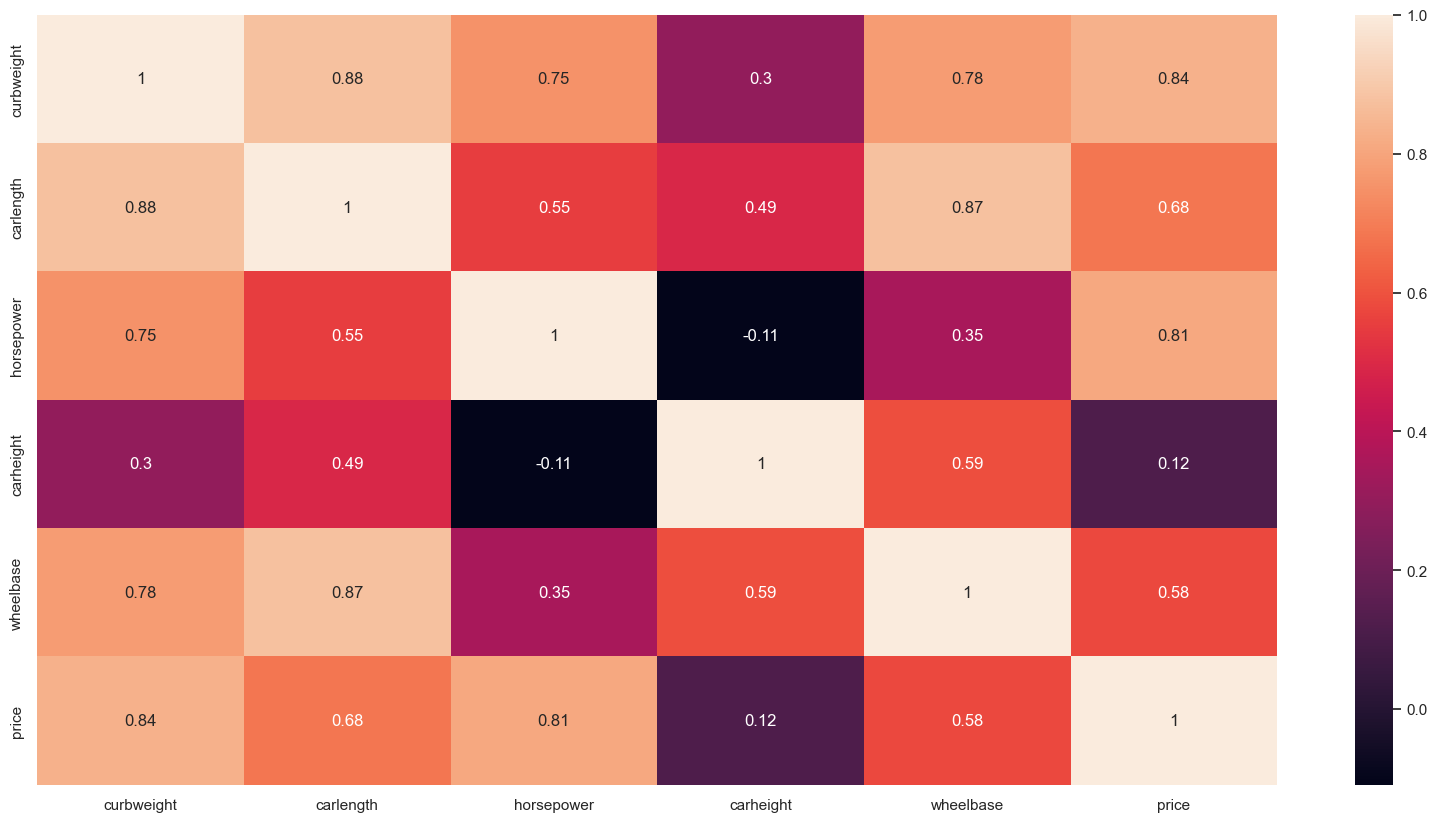

In [53]:
# Correlación de variables

columnas_numericas = ['curbweight','carlength','horsepower','carheight','wheelbase','price']
corr_coef = np.corrcoef(data[columnas_numericas].values.T)
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(
    corr_coef,
    annot=True,
    yticklabels=columnas_numericas,
    xticklabels=columnas_numericas
)



In [54]:
correlation_matrix = data.corr()
target_correlation = correlation_matrix['price']

# Excluir la correlación con la variable 'price' y consultar las varibles con mayor correlación con el precio
top_correlations = target_correlation.drop('price').abs().sort_values(ascending=False).head(5)

print(top_correlations.index)
print(top_correlations)

# Se obtienen las variables con las correlaciones más altas.

Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'cylindernumber'], dtype='object')
enginesize        0.874145
curbweight        0.835305
horsepower        0.808139
carwidth          0.759325
cylindernumber    0.718305
Name: price, dtype: float64


In [55]:
data.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'brand_name_AUDI', 'brand_name_BMW',
       'brand_name_BUICK', 'brand_name_CHEVROLET', 'brand_name_DODGE',
       'brand_name_HONDA', 'brand_name_ISUZU', 'brand_name_JAGUAR',
       'brand_name_MAZDA', 'brand_name_MERCURY', 'brand_name_MITSUBISHI',
       'brand_name_NISSAN', 'brand_name_PEUGEOT', 'brand_name_PLYMOUTH',
       'brand_name_PORSCHE', 'brand_name_RENAULT', 'brand_name_SAAB',
       'brand_name_SUBARU', 'brand_name_TOYOTA', 'brand_name_VOLKSWAGEN',
       'brand_name_VOLVO', 'fueltype_GAS', 'aspiration_TURBO',
       'carbody_HARDTOP', 'carbody_HATCHBACK', 'carbody_SEDAN',
       'carbody_WAGON', 'drivewheel_FWD', 'drivewheel_RWD',
       'enginelocation_REAR', 'enginetype_DOHCV', 'enginetype_L',
       'enginetype_OHC', '

MODELO DE CLASIFICACIÓN KNN:

3. División del dataset en características (x) y variable objetivo (y):

In [56]:
VARS = ['curbweight','carlength','horsepower','carheight','wheelbase']
TARGET = ['price_category']

x = data[VARS]
y = data[TARGET]

4. Escalamiento de datos y división de datos en cojuntos de entrenamiento y testeo

In [57]:
# División de datos en conjuntos de entrenamiento y prueba:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

# Variables numéricas escaladas:
esc = StandardScaler()
x_train_esc = esc.fit_transform(x_train[['curbweight','carlength','horsepower','carheight','wheelbase']])
x_test_esc = esc.transform(x_test[['curbweight','carlength','horsepower','carheight','wheelbase']])


5. Entrenamiento y búsqueda de 'k' óptimo para el modelo para clasificación:

In [58]:
# Definir el modelo
model = KNeighborsClassifier()

# Definir los hiperparámetros a ajustar y sus posibles valores
param_grid = {
    'n_neighbors': list(range(3, len(x_train)//2 + 1)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

# Imprimir los mejores parámetros encontrados con la búsqueda de cuadrícula
print("Mejores hiperparámetros (GridSearchCV):")
print(best_params_grid)

# Realizar predicciones en el conjunto de prueba con el mejor modelo de la búsqueda de cuadrícula
predictions_grid = best_model_grid.predict(x_test)

C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Mejores hiperparámetros (GridSearchCV):
{'algorithm': 'auto', 'n_neighbors': 29, 'weights': 'distance'}


C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [59]:
print(best_model_grid)
print(f"Mejor precisión durante la validación cruzada: {grid_search.best_score_:.2f}")

KNeighborsClassifier(n_neighbors=29, weights='distance')
Mejor precisión durante la validación cruzada: 0.94


6. Matrix de Confusión:

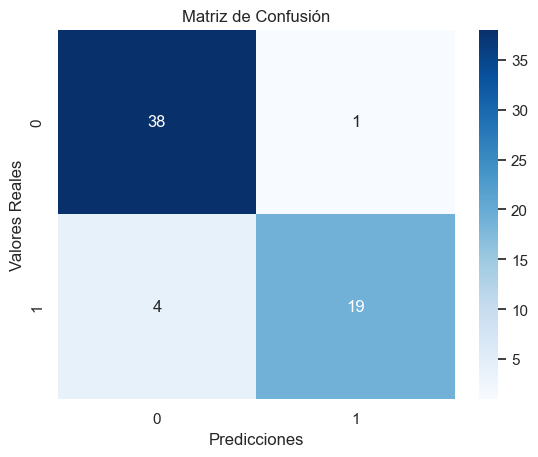

In [60]:
# Obtener la matriz de confusión para el conjunto de prueba
conf_matrix = confusion_matrix(y_test, predictions_grid)

# Crear un mapa de calor con seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

In [61]:
print('accuracy = ',accuracy_score(y_test, predictions_grid))
print('sensibilidad = ',recall_score(y_test, predictions_grid, pos_label = 1))
print('especificidad = ',recall_score(y_test, predictions_grid, pos_label = 0))

accuracy =  0.9193548387096774
sensibilidad =  0.8260869565217391
especificidad =  0.9743589743589743


7. Pronosticar un nuevo resultado de prueba:

In [62]:
# Suponiendo que tienes un nuevo conjunto de características para predecir
#nueva_observacion = [[-1,4,103.13,174.76,64.6,59,8,2535,4,122,3.34,3.46,8.5,88,5000,24,30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0]]

# Realizar la predicción con el mejor modelo de la búsqueda de cuadrícula
#prediccion_nueva_observacion = best_model_grid.predict(nueva_observacion)

#print(f"Predicción para la nueva observación: {prediccion_nueva_observacion}")


8. Validación cruzada LOOCV:

In [63]:
loo = LeaveOneOut()
accuracy_scores_loo = cross_val_score(best_model_grid, x_test, y_test, cv=loo, scoring='accuracy')

C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [64]:
# Datos de la validación:

print("Puntuaciones de Precisión LOOCV:")
print(accuracy_scores_loo)

# Imprimir la Precisión Promedio
average_accuracy_loo = accuracy_scores_loo.mean()
print(f'Precisión promedio LOOCV: {average_accuracy_loo:.2f}')

Puntuaciones de Precisión LOOCV:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
Precisión promedio LOOCV: 0.87


9. Resumen del modelo de claisificación:

| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 29                 |
| weights         | distance           |
| accuracy        | 0.92              |
| sensibilidad    | 0.82               |
| especificidad   | 0.97               |
| validación LOOCV   | 0.87              | >> Accuracy validación cruzada (indica que el modelo es reproducible)

*Nota:* `n_neighbors` (k) optimizado mediante grid_search sobre la valoración de 3 hasta la mitad de los registros.


# MODELO DE REGRESIÓN KNN:

10. División del dataset en características 'x' y variable objetivo 'y':

In [65]:
VARSr = ['curbweight','carlength','horsepower','carheight','wheelbase']
       
TARGETr = ['price']

xr = data[VARSr]
yr = data[TARGETr]

11. Escalamiento de datos y división de datos en cojuntos de entrenamiento y texteo

In [66]:
# División de datos en conjuntos de entrenamiento y prueba:
x_trainr, x_testr, y_trainr, y_testr = train_test_split(xr, yr, test_size=0.3, random_state=123)

# Variables numéricas escaladas:
escr = StandardScaler()
x_train_escr = escr.fit_transform(x_trainr[['curbweight','carlength','horsepower','carheight','wheelbase']])
x_test_escr = escr.transform(x_testr[['curbweight','carlength','horsepower','carheight','wheelbase']])


12.  Entrenamiento y búsqueda de hiperparámetros óptimos para el modelo para regresión:

In [67]:
# Definir el modelo para regresión
model_regression = KNeighborsRegressor()

# Definir los hiperparámetros a ajustar y sus posibles valores
param_grid_regression = {
    'n_neighbors': list(range(3, len(x_trainr)//2 + 1)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Realizar la búsqueda de cuadrícula para regresión
grid_search_regression = GridSearchCV(model_regression, param_grid_regression, cv=5, scoring='neg_mean_squared_error')
grid_search_regression.fit(x_trainr, y_trainr)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params_regression = grid_search_regression.best_params_
best_model_regression = grid_search_regression.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo de la búsqueda de cuadrícula
predictions_regression = best_model_regression.predict(x_testr)


In [68]:
print(best_params_regression)
print(f"Mejor precisión durante la validación cruzada: {grid_search_regression.best_score_:.2f}")

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Mejor precisión durante la validación cruzada: -14417650.04


13. Evaluación del modelo correlación (R^2) entre los valores reales del testeo y las predicciones:

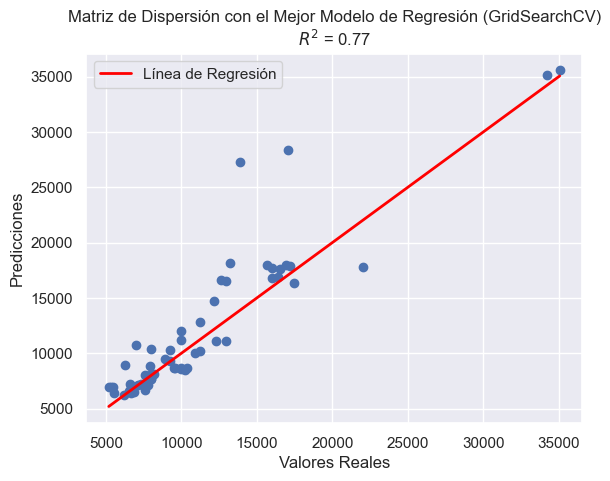

In [69]:
# Convertir los datos a tipo numérico si es necesario
y_testr = y_testr.astype(float)
predictions_regression = predictions_regression.astype(float)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_testr, predictions_regression)

# Crear una línea de regresión
line = np.arange(min(y_testr['price']), max(y_testr['price']),1)
line = line.reshape(-1, 1)
regression_line = line

# Visualizar la matriz de dispersión con la línea de regresión y el R^2
plt.scatter(y_testr, predictions_regression)
plt.plot(line, regression_line, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'Matriz de Dispersión con el Mejor Modelo de Regresión (GridSearchCV)\n$R^2$ = {r2:.2f}')
plt.legend()
plt.show()



14. Pronosticar un nuevo dato de prueba:

In [70]:
# Suponiendo que tienes un nuevo conjunto de características para predecir
#nueva_observacionr = [[-1,4,103.13,174.76,64.6,59,8,2535,4,122,3.34,3.46,8.5,88,5000,24,30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0]]

# Realizar la predicción con el mejor modelo de la búsqueda de cuadrícula
#prediccion_nueva_observacionr = best_model_regression.predict(nueva_observacionr)

#print(f"Predicción para la nueva observación: {prediccion_nueva_observacionr}")

15. Resumen métricas de evaluación del modelo de regresión:

In [71]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_testr, predictions_regression)

# Calcular la raíz cuadrada del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_testr, predictions_regression)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_testr, predictions_regression)

# Imprimir las métricas
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz Cuadrada del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")


Error Cuadrático Medio (MSE): 7550119.22
Raíz Cuadrada del Error Cuadrático Medio (RMSE): 2747.75
Error Absoluto Medio (MAE): 1531.46
Coeficiente de Determinación (R^2): 0.77


16. Validación Cruzada 'neg_mean_squared_error':

In [72]:
loo = LeaveOneOut()
mse_scores_loo = cross_val_score(best_model_regression, x_testr, y_testr, cv=loo, scoring='neg_mean_squared_error')

# Convertir las puntuaciones de error cuadrático medio negativo a positivo
mse_scores_loo = -mse_scores_loo

# Imprimir las puntuaciones de MSE LOOCV
print("Puntuaciones de MSE LOOCV:")
print(mse_scores_loo)

# Calcular el MSE promedio
average_mse_loo = mse_scores_loo.mean()
print(f'MSE promedio LOOCV: {average_mse_loo:.2f}')


Puntuaciones de MSE LOOCV:
[3.40614229e+06 1.04387457e+08 3.52998449e+06 6.39950245e+03
 2.05495502e+03 1.83604338e+04 1.59924482e+05 2.26423158e+02
 1.26237532e+05 3.02500041e+05 3.49706105e+01 1.98524830e+07
 3.87841769e+05 3.25390059e+06 1.44219175e+06 1.63760416e+05
 2.95808998e+03 4.02367470e+06 5.50230329e+05 5.75228427e+04
 4.44544518e+06 4.88613065e+04 5.23593825e+05 3.18920101e+05
 9.44866396e+06 2.53596823e+06 9.86464465e+06 0.00000000e+00
 6.68441614e+07 6.96939066e+05 1.03241893e+06 3.81104787e+05
 7.47590021e+05 1.31754977e+05 4.95758488e+07 2.73778431e+05
 1.88792039e+05 1.81371661e+06 2.24230960e+06 1.14659867e+07
 3.50554759e+04 6.25075753e+05 3.80743491e+06 4.68751864e+05
 2.52713140e+06 8.01969970e+04 1.85060820e+05 7.70440424e+05
 1.36132479e+07 1.13774743e+05 1.10214218e+06 7.34756217e+03
 1.16734149e+05 3.21365603e+07 6.48445710e+07 1.35189669e+03
 0.00000000e+00 7.41187442e+06 1.55078524e+03 3.79924781e+06
 6.42813845e+03 3.15191443e+02]
MSE promedio LOOCV: 703078

17. Resumen del modelo de regresión:

| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 7                  |
| weights         | distance           |
| algorithm       | auto          |
| scoring_type    | neg_mean_squared_error|
| scoring_value   | -12992578.69|
| MSE   |7550119.22|
| RMSE   |2747.75|
| MAE   |1531.46|
| R^2 (texts vs Predictions) |0.77|
| MSE (validación cruzada - texts) |7030785.13|

*Nota:* `n_neighbors` (k) optimizado mediante grid_search sobre la valoración de 3 hasta la mitad de los registros.


scoring='neg_mean_squared_error'